In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
encodings = ['utf-8', 'latin-1', 'iso-8859-1', 'cp1252']

for enc in encodings:
    try:
        df = pd.read_csv('/content/car_purchasing.csv', encoding=enc)
        print(f"Successfully read the file with encoding: {enc}")
        print(df.head())
        break
    except UnicodeDecodeError as e:
        print(f"Failed to read the file with encoding: {enc}. Error: {e}")

Failed to read the file with encoding: utf-8. Error: 'utf-8' codec can't decode byte 0xc5 in position 0: invalid continuation byte
Successfully read the file with encoding: latin-1
     customer name                                    customer e-mail  \
0    Martina Avila  cubilia.Curae.Phasellus@quisaccumsanconvallis.edu   
1    Harlan Barnes                                eu.dolor@diam.co.uk   
2  Naomi Rodriquez  vulputate.mauris.sagittis@ametconsectetueradip...   
3  Jade Cunningham                            malesuada@dignissim.com   
4     Cedric Leach     felis.ullamcorper.viverra@egetmollislectus.net   

        country  gender        age  annual Salary  credit card debt  \
0      Bulgaria       0  41.851720    62812.09301      11609.380910   
1        Belize       0  40.870623    66646.89292       9572.957136   
2       Algeria       1  43.152897    53798.55112      11160.355060   
3  Cook Islands       1  58.271369    79370.03798      14426.164850   
4        Brazil       1  

In [7]:
df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [8]:
df.describe()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


In [9]:
df.isna().sum()

customer name          0
customer e-mail        0
country                0
gender                 0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

In [11]:
cols = list(df.columns)
def check_outliers(df,column_name):
    lower = df[column_name].mean() - 3 * df[column_name].std()
    upper = df[column_name].mean() + 3 * df[column_name].std()
    outlier_count = df[(df[column_name] < lower) | (df[column_name] > upper)].shape[0]
    if outlier_count > 0:
        return True
    else:
        return False

In [13]:
for col in cols:
  if(df[col].dtypes !='object'):
    print(f'column = {col} | Outlier = {check_outliers(df,col)}')

column = gender | Outlier = False
column = age | Outlier = True
column = annual Salary | Outlier = True
column = credit card debt | Outlier = False
column = net worth | Outlier = True
column = car purchase amount | Outlier = True


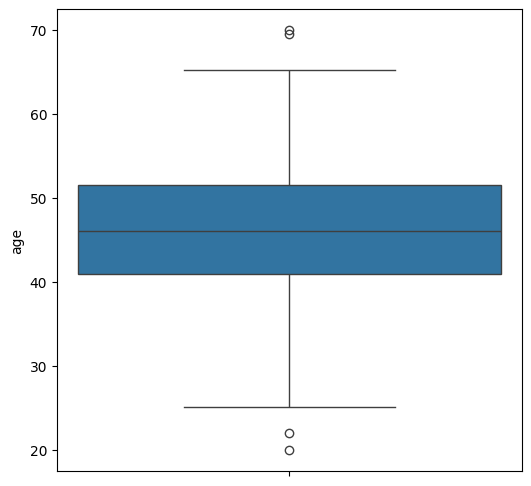

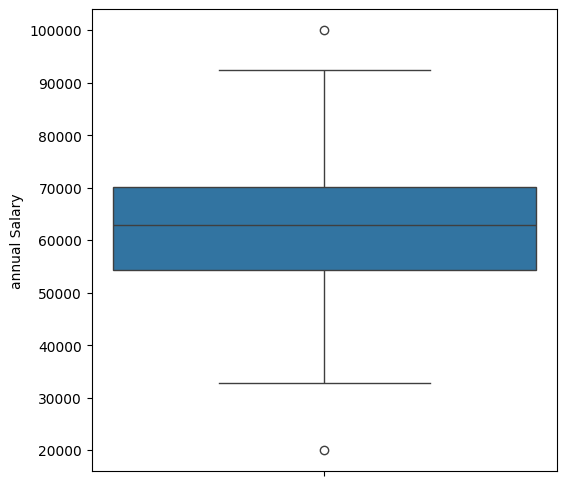

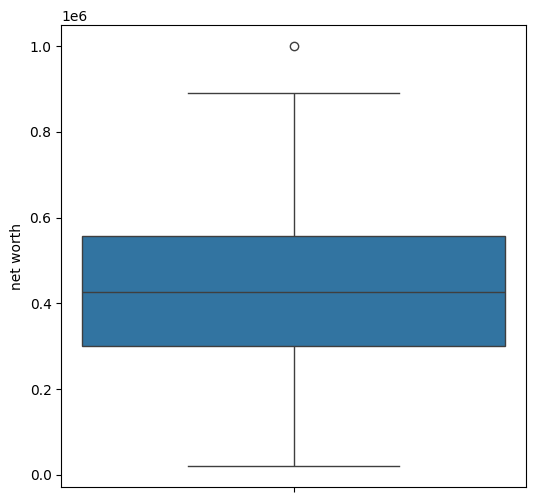

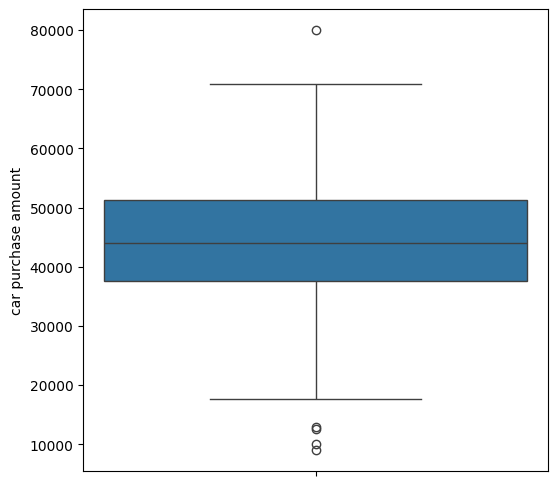

In [21]:
#cheked outliers visually as well
out = ['age','annual Salary','net worth','car purchase amount']
for col in out:
  plt.figure(figsize=(6,6))
  sns.boxplot(df[col])
  plt.plot()

In [22]:
def remove_outlier(df1 , col):
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1-1.5*IQR
    upper_whisker = Q3+1.5*IQR
    df[col] = np.clip(df1[col] , lower_whisker , upper_whisker)
    return df1

In [23]:
for col in out:
  remove_outlier(df,col)

In [24]:
for col in cols:
  if(df[col].dtypes !='object'):
    print(f'column = {col} | Outlier = {check_outliers(df,col)}')
#outliers removed

column = gender | Outlier = False
column = age | Outlier = False
column = annual Salary | Outlier = False
column = credit card debt | Outlier = False
column = net worth | Outlier = False
column = car purchase amount | Outlier = False


In [25]:
df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [27]:
df.drop(columns=['customer name','customer e-mail'],axis =1 , inplace=True)

In [28]:
df.head()

,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [31]:
df.country.unique().shape[0]

211

In [34]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.country=le.fit_transform(df.country)

In [35]:
df.head()

,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,27,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,17,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,1,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,41,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,26,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [77]:
x = df.drop('car purchase amount',axis=1)
y = df[['car purchase amount']]

In [78]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
x_scaled = ms.fit_transform(x)
y_scaled = ms.fit_transform(y)

In [42]:
x_scaled.shape

(500, 6)

In [79]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train, y_test = train_test_split(x_scaled,y_scaled,test_size= 0.2, random_state=30)

In [80]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU, ELU, PReLU
from tensorflow.keras.layers import Dropout

In [81]:
model = Sequential()
model.add(Dense(units = 10 ,activation='relu',input_dim=6))
model.add(Dense(units = 7,activation='relu'))
model.add(Dense(units=1, activation='linear'))


In [82]:
model.compile(optimizer= 'adam',loss='mean_squared_error',metrics=['accuracy'])

In [83]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 10)                70        
                                                                 
 dense_20 (Dense)            (None, 7)                 77        
                                                                 
 dense_21 (Dense)            (None, 1)                 8         
                                                                 
Total params: 155 (620.00 Byte)
Trainable params: 155 (620.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [85]:
model.fit(x_train,y_train, validation_split=0.3,epochs=150)

Epoch 1/150
9/9 [==============================] - 0s 13ms/step - loss: 0.0024 - accuracy: 0.0179 - val_loss: 0.0026 - val_accuracy: 0.0000e+00
Epoch 2/150
9/9 [==============================] - 0s 6ms/step - loss: 0.0023 - accuracy: 0.0179 - val_loss: 0.0026 - val_accuracy: 0.0000e+00
Epoch 3/150
9/9 [==============================] - 0s 6ms/step - loss: 0.0022 - accuracy: 0.0179 - val_loss: 0.0024 - val_accuracy: 0.0000e+00
Epoch 4/150
9/9 [==============================] - 0s 6ms/step - loss: 0.0021 - accuracy: 0.0179 - val_loss: 0.0023 - val_accuracy: 0.0000e+00
Epoch 5/150
9/9 [==============================] - 0s 6ms/step - loss: 0.0020 - accuracy: 0.0179 - val_loss: 0.0022 - val_accuracy: 0.0000e+00
Epoch 6/150
9/9 [==============================] - 0s 6ms/step - loss: 0.0020 - accuracy: 0.0179 - val_loss: 0.0021 - val_accuracy: 0.0000e+00
Epoch 7/150
9/9 [==============================] - 0s 8ms/step - loss: 0.0019 - accuracy: 0.0179 - val_loss: 0.0020 - val_accuracy: 0.0000e+0

In [87]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr = LinearRegression()

lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
r2_score(y_test,y_pred)

0.9994080533923574